In [1]:
# conda activate aso_design
import pandas as pd
from scripts.data_genertion.consts import *
from asodesigner.file_utils import read_human_genome_fasta_dict
from asodesigner.consts import *
all_data = pd.read_csv(DATA_PATH / 'data_from_article_fixed.csv')


In [2]:
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_regression
def print_correlations(df, name1, name2, p_value_threshold=None):
    if p_value_threshold is None:
        p_value_threshold = 1
    corr, p_value = pearsonr(df[name1], df[name2])
    if p_value < p_value_threshold:
        print(f"Feature: {name1:<35}, Pearson: {corr:<5.2f}, p-value: {p_value:<10.2} Target: {name2:<35}")
    corr, p_value = spearmanr(df[name1], df[name2])
    if p_value < p_value_threshold:
        print(f"Feature: {name1:<35}, Spearman: {corr:<5.2f}, p-value: {p_value:<10.2} Target: {name2:<35}")

        # MIC (via Mutual Information)
    try:
        mic = mutual_info_regression(df[[name1]], df[name2], discrete_features='auto')[0]
        print(f"Feature: {name1:<35}, MIC:      {mic:<5.2f}                             Target: {name2:<35}")
    except Exception as e:
        print(f"Could not compute MIC for {name1} vs {name2}: {e}")    

Feture generation

In [3]:
# purine content
from asodesigner.features.seq_features import purine_content
from Bio.Seq import Seq

all_data['purine_content'] = all_data["Sequence"].apply(lambda x: purine_content(x))
sequence_features = ['purine_content']

In [4]:
# count_g_runs
from asodesigner.features.seq_features import count_g_runs
all_data['ggg_counts'] = all_data["Sequence"].apply(lambda x: count_g_runs(x))
sequence_features.append("ggg_counts")

In [5]:
#ENC
from asodesigner.features.seq_features import compute_ENC
all_data["ASOֹ_ENC"] = all_data["Sequence"].apply(lambda x: compute_ENC(x))
sequence_features.append("ASO_ENC")

In [6]:
# palindromic count of 4 and 6 palindroms
from asodesigner.features.seq_features import palindromic_fraction
all_data['4 palindromic'] = all_data[SEQUENCE].apply(lambda x: palindromic_fraction(x,4))
sequence_features.append("4 palindromic")

all_data['6 palindromic'] = all_data[SEQUENCE].apply(lambda x: palindromic_fraction(x,6))
sequence_features.append("6 palindromic")


In [7]:
# entropy
from asodesigner.features.seq_features import seq_entropy
all_data["entropy"] = all_data["Sequence"].apply(lambda x: seq_entropy(x))
sequence_features.append("entropy")

In [8]:
#hairpin_score
from asodesigner.features.seq_features import hairpin_score
all_data["hairpin_score"] = all_data["Sequence"].apply(lambda x : hairpin_score(x))
sequence_features.append("hairpin_score")

In [9]:
#toxic_motif_count
from asodesigner.features.seq_features import toxic_motif_count
all_data["toxic_motif_count"] = all_data["Sequence"].apply(lambda x : toxic_motif_count(x))
sequence_features.append("toxic_motif_count")

In [10]:
# hairpin_dG_energy
from asodesigner.features.seq_features import hairpin_dG_energy
all_data["hairpin_dG_energy"] = all_data["Sequence"].apply(lambda x : hairpin_dG_energy(x))
sequence_features.append("hairpin_dG_energy")

structure_found: False
structure_found: False
structure_found: False
structure_found: True
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: True
structure_found: True
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: True
structure_found: True
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found:

In [11]:
#hairpin_tm
from asodesigner.features.seq_features import hairpin_tm
all_data["hairpin_tm"] = all_data["Sequence"].apply(lambda x : hairpin_tm(x))
sequence_features.append("hairpin_tm")


In [12]:
#tandem_repeats_score
from asodesigner.features.seq_features import tandem_repeats_score
all_data["tandem_repeats_score"] = all_data["Sequence"].apply(lambda x : tandem_repeats_score(x))
sequence_features.append("tandem_repeats_score")

In [13]:
# dispersed_repeats_score
from asodesigner.features.seq_features import dispersed_repeats_score
all_data["dispersed_repeats_score"] = all_data["Sequence"].apply(lambda x : dispersed_repeats_score(x))
sequence_features.append("dispersed_repeats_score")


In [14]:
#flexible_dinucleotide_fraction
from asodesigner.features.seq_features import flexible_dinucleotide_fraction
all_data["flexible_dinucleotide_fraction"] = all_data["Sequence"].apply(lambda x : flexible_dinucleotide_fraction(x))
sequence_features.append("flexible_dinucleotide_fraction")

In [15]:
#gc_skew
from asodesigner.features.seq_features import gc_skew
all_data["gc_skew"] = all_data["Sequence"].apply(lambda x : gc_skew(x))
sequence_features.append("gc_skew")

In [16]:
#gc_skew_ends
from asodesigner.features.seq_features import gc_skew_ends
all_data["gc_skew_ends"] = all_data["Sequence"].apply(lambda x : gc_skew_ends(x))
sequence_features.append("gc_skew_ends")

In [17]:
#at_skew
from asodesigner.features.seq_features import at_skew
all_data["at_skew"] = all_data["Sequence"].apply(lambda x : at_skew(x))
sequence_features.append("at_skew")

In [18]:
#stop_codon_count
from asodesigner.features.seq_features import stop_codon_count
all_data["stop_codon_count"] = all_data["Sequence"].apply(lambda x : stop_codon_count(x))
sequence_features.append("stop_codon_count")

In [19]:
#nucleotide_diversity
from asodesigner.features.seq_features import nucleotide_diversity
all_data["nucleotide_diversity"] = all_data["Sequence"].apply(lambda x : nucleotide_diversity(x))
sequence_features.append("nucleotide_diversity")

In [20]:
#cg_dinucleotide_fraction
import importlib
#import niv_features
#importlib.reload(niv_features)
from asodesigner.features.seq_features import cg_dinucleotide_fraction
all_data["cg_dinucleotide_fraction"] = all_data["Sequence"].apply(lambda x : cg_dinucleotide_fraction(x))
sequence_features.append("cg_dinucleotide_fraction")

In [21]:
#poly_pyrimidine_stretch
from asodesigner.features.seq_features import poly_pyrimidine_stretch
all_data["poly_pyrimidine_stretch"] = all_data["Sequence"].apply(lambda x : poly_pyrimidine_stretch(x))
sequence_features.append("poly_pyrimidine_stretch")

In [22]:
#dinucleotide_entropy
from asodesigner.features.seq_features import dinucleotide_entropy
all_data["dinucleotide_entropy"] = all_data["Sequence"].apply(lambda x : dinucleotide_entropy(x))
sequence_features.append("dinucleotide_entropy")

In [23]:
#gc_block_length
from asodesigner.features.seq_features import gc_block_length
all_data["gc_block_length"] = all_data["Sequence"].apply(lambda x : gc_block_length(x))
sequence_features.append("gc_block_length")

In [24]:
#at_rich_region_score
from asodesigner.features.seq_features import at_rich_region_score
all_data["at_rich_region_score"] = all_data["Sequence"].apply(lambda x : at_rich_region_score(x))
sequence_features.append("at_rich_region_score")

In [25]:
from asodesigner.features.tai import calc_tAI, tai_weights
weights_tai = tai_weights("hm")
all_data["ASO_tai"] = all_data["Sequence"].apply(lambda x : calc_tAI(x, weights_tai))
sequence_features.append("ASO_tai")

In [26]:
import numpy as np

all_data_no_nan = all_data.dropna(subset=[INHIBITION]).copy()
all_data_no_nan.loc[:, 'log_inhibition'] = -np.log(-all_data_no_nan[INHIBITION] + 100.001)

In [27]:
all_data_no_nan_human = all_data_no_nan[all_data_no_nan[CELL_LINE_ORGANISM] == 'human']
genes = all_data_no_nan[CANONICAL_GENE].copy()
genes_u = list(set(genes))
genes_u.remove('HBV')
genes_u.remove('negative_control')

In [28]:
from asodesigner.read_human_genome import get_locus_to_data_dict
import pickle
from asodesigner.consts import CACHE_DIR


cache_path = CACHE_DIR / 'gene_to_data_simple_cache.pickle'
if not cache_path.exists():
    gene_to_data = get_locus_to_data_dict(include_introns=True, gene_subset=genes_u)
    with open(cache_path, 'wb') as f:
        pickle.dump(gene_to_data, f)
else:
    with open(cache_path, 'rb') as f:
        gene_to_data = pickle.load(f)

In [29]:
from asodesigner.util import get_antisense
import numpy as np

# Filter relevant genes
all_data_human_gene = all_data_no_nan_human[all_data_no_nan_human[CANONICAL_GENE].isin(genes_u)].copy()

# Column names and their purpose
SENSE_START = 'sense_start'               # Genomic index of ASO binding site in pre-mRNA
SENSE_LENGTH = 'sense_length'             # Length of the ASO (in nucleotides)
SENSE_TYPE = 'sense_type'                 # Whether the binding site falls in an exon or intron
FLANK_SEQUENCE = 'flank_sequence'         # ±50 nt surrounding the binding site in pre-mRNA
CDS_SEQUENCE = 'cds_sequence'             # Full coding region (CDS) of the gene
IN_CODING_REGION = 'in_coding_region'     # Whether the ASO binds inside the CDS on a real exon
LOCAL_CODING_REGION = 'local_coding_region_around_ASO'  # ±50 nt around the binding site within the CDS
FLANK_SIZE = 50                           # Number of flanking nucleotides to extract

# Initialize new columns
all_data_human_gene[SENSE_START] = 0
all_data_human_gene[SENSE_LENGTH] = 0
all_data_human_gene[SENSE_TYPE] = "NA"
all_data_human_gene[FLANK_SEQUENCE] = ""
all_data_human_gene[CDS_SEQUENCE] = ""
all_data_human_gene[IN_CODING_REGION] = False
all_data_human_gene[LOCAL_CODING_REGION] = ""

# Cache CDS info per gene
gene_to_cds_info = {}

for index, row in all_data_human_gene.iterrows():
    gene_name = row[CANONICAL_GENE]
    locus_info = gene_to_data[gene_name]
    pre_mrna = locus_info.full_mrna
    antisense = row[SEQUENCE]
    sense = get_antisense(antisense)

    idx = pre_mrna.find(sense)
    all_data_human_gene.loc[index, SENSE_START] = idx
    all_data_human_gene.loc[index, SENSE_LENGTH] = len(antisense)

    if idx != -1:
        genome_corrected_index = idx + locus_info.exon_indices[0][0]

        # Determine whether binding is in exon or intron
        region_type = "intron"
        for exon_start, exon_end in locus_info.exon_indices:
            if exon_start <= genome_corrected_index <= exon_end:
                region_type = "exon"
                break
        all_data_human_gene.loc[index, SENSE_TYPE] = region_type

        # Extract ±50 nt flanking the binding site from pre-mRNA
        flank_start = max(0, idx - FLANK_SIZE)
        flank_end = min(len(pre_mrna), idx + len(sense) + FLANK_SIZE)
        flank_seq = str(pre_mrna[flank_start:flank_end])
        all_data_human_gene.loc[index, FLANK_SEQUENCE] = flank_seq

        # Build CDS and genome→mRNA mapping (cached per gene)
        if gene_name not in gene_to_cds_info:
            cds_seq = ""
            genome_to_mrna_map = {}
            mrna_idx = 0
            for exon_start, exon_end in locus_info.exon_indices:
                for gpos in range(exon_start, exon_end):
                    if mrna_idx >= len(pre_mrna):
                        break
                    if locus_info.cds_start <= gpos <= locus_info.cds_end:
                        cds_seq += pre_mrna[mrna_idx]
                        genome_to_mrna_map[gpos] = len(cds_seq) - 1
                    mrna_idx += 1
            gene_to_cds_info[gene_name] = (cds_seq, genome_to_mrna_map)
        else:
            cds_seq, genome_to_mrna_map = gene_to_cds_info[gene_name]

        all_data_human_gene.loc[index, CDS_SEQUENCE] = cds_seq

        # Identify if ASO binds within CDS and on real exon, and extract local CDS region around it
        if (
            locus_info.cds_start <= genome_corrected_index <= locus_info.cds_end
            and genome_corrected_index in genome_to_mrna_map
        ):
            all_data_human_gene.loc[index, IN_CODING_REGION] = True
            cds_idx = genome_to_mrna_map[genome_corrected_index]
            start = max(0, cds_idx - FLANK_SIZE)
            end = min(len(cds_seq), cds_idx + len(sense) + FLANK_SIZE)
            local_seq = cds_seq[start:end]
            all_data_human_gene.loc[index, LOCAL_CODING_REGION] = local_seq


In [30]:
# Filter genes that were not found in genome
all_data_human_gene_premrna = all_data_human_gene[all_data_human_gene[SENSE_START] != -1]



In [31]:
from asodesigner.features.seq_features import compute_ENC, calculate_chimera_ars
from asodesigner.features.tai import calc_tAI, tai_weights
from asodesigner.features.suffix_array import build_suffix_array
from sklearn.preprocessing import StandardScaler

# 1. Determine best region to compute features: use local CDS region if available, otherwise use full CDS
def get_best_coding_context(row):
    local = row["local_coding_region_around_ASO"]
    return local if isinstance(local, str) and local.strip() else row["cds_sequence"]

# Apply the function to create a column for the best region
all_data_human_gene_premrna.loc[:, "region_for_features"] = all_data_human_gene_premrna.apply(get_best_coding_context, axis=1)

# 2. Add a flag indicating whether the region is local (1) or full gene CDS (0)
all_data_human_gene_premrna.loc[:, "region_is_local"] = all_data_human_gene_premrna["local_coding_region_around_ASO"].apply(
    lambda x: isinstance(x, str) and x.strip() != ""
).astype(int)




/tmp/ipykernel_1057/3014594650.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_human_gene_premrna.loc[:, "region_for_features"] = all_data_human_gene_premrna.apply(get_best_coding_context, axis=1)
/tmp/ipykernel_1057/3014594650.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_human_gene_premrna.loc[:, "region_is_local"] = all_data_human_gene_premrna["local_coding_region_around_ASO"].apply(


In [32]:
# 3. Compute ENC feature on the chosen region
all_data_human_gene_premrna.loc[:, "enc_score_gene"] = all_data_human_gene_premrna["region_for_features"].apply(compute_ENC)


/tmp/ipykernel_1057/424485444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_human_gene_premrna.loc[:, "enc_score_gene"] = all_data_human_gene_premrna["region_for_features"].apply(compute_ENC)


In [33]:
# 4. Compute tAI using human weights
weights_tai = tai_weights("hm")
all_data_human_gene_premrna.loc[:, "tai_score_gene"] = all_data_human_gene_premrna["region_for_features"].apply(
    lambda seq: calc_tAI(seq, weights_tai)
)

/tmp/ipykernel_1057/1292811674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_human_gene_premrna.loc[:, "tai_score_gene"] = all_data_human_gene_premrna["region_for_features"].apply(


In [34]:
# 5. Compute chimera score between ASO and region
all_data_human_gene_premrna.loc[:, "ASO_chimera_score"] = all_data_human_gene_premrna.apply(
    lambda row: calculate_chimera_ars(
        build_suffix_array(row["region_for_features"]),
        row["Sequence"],
        step_size=1
    ),
    axis=1
)

/tmp/ipykernel_1057/2036406566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_human_gene_premrna.loc[:, "ASO_chimera_score"] = all_data_human_gene_premrna.apply(


In [ ]:
# 6. Normalize each feature using Z-score, separately for local vs global regions
for feature in ["enc_score_gene", "tai_score_gene", "ASO_chimera_score"]:
    scaler_local = StandardScaler()
    scaler_global = StandardScaler()

    local_mask = all_data_human_gene_premrna["region_is_local"] == 1
    global_mask = ~local_mask

    all_data_human_gene_premrna.loc[local_mask, feature] = scaler_local.fit_transform(
        all_data_human_gene_premrna.loc[local_mask, [feature]]
    )

    all_data_human_gene_premrna.loc[global_mask, feature] = scaler_global.fit_transform(
        all_data_human_gene_premrna.loc[global_mask, [feature]]
    )


/tmp/ipykernel_1057/2997561892.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_human_gene_premrna.loc[local_mask, f"{feature}_scaled"] = scaler_local.fit_transform(
/tmp/ipykernel_1057/2997561892.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_human_gene_premrna.loc[local_mask, f"{feature}_scaled"] = scaler_local.fit_transform(
/tmp/ipykernel_1057/2997561892.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [42]:
all_data_human_gene_premrna.columns

Index(['ISIS', 'Target_gene', 'Cell_line', 'Density(cells/well)',
       'Transfection', 'ASO_volume(nM)', 'Treatment_Period(hours)',
       'Primer_probe_set', 'Sequence', 'Modification', 'Location',
       'Chemical_Pattern', 'Linkage', 'Linkage_Location', 'Smiles',
       'Inhibition(%)', 'seq_length', 'Canonical Gene Name',
       'Cell line organism', 'purine_content', 'ggg_counts', 'ASOֹ_ENC',
       '4 palindromic', '6 palindromic', 'entropy', 'hairpin_score',
       'toxic_motif_count', 'hairpin_dG_energy', 'hairpin_tm',
       'tandem_repeats_score', 'dispersed_repeats_score',
       'flexible_dinucleotide_fraction', 'gc_skew', 'gc_skew_ends', 'at_skew',
       'stop_codon_count', 'nucleotide_diversity', 'cg_dinucleotide_fraction',
       'poly_pyrimidine_stretch', 'dinucleotide_entropy', 'gc_block_length',
       'at_rich_region_score', 'ASO_tai', 'log_inhibition', 'sense_start',
       'sense_length', 'sense_type', 'flank_sequence', 'cds_sequence',
       'in_coding_region',

In [38]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection  import train_test_split, cross_val_score
from sklearn.metrics import make_scorer
import pandas as pd
from scripts.data_genertion.consts import *

In [3]:
all_data_human_gene_premrna_no_nan = all_data_human_gene_premrna.copy()
filtered = all_data_human_gene_premrna_no_nan
filtered = filtered[filtered['Cell line organism'] == 'human']
filtered = filtered[filtered['Cell line organism'] == 'human']
print(len(filtered))
filtered = filtered.dropna(subset=[INHIBITION]).copy()
filtered = filtered.dropna(subset=[DENSITY]).copy()

ONE_HOT_FEATURE_NAMES = [CELL_LINE, TRANSFECTION, MODIFICATION, SENSE_TYPE]
# append more one-hot features 'first_nucleotide', 'second_nucleotide'

for one_hot_feature in ONE_HOT_FEATURE_NAMES:
    filtered = pd.get_dummies(filtered, columns=[one_hot_feature]).copy()

filtered.loc[:, 'log_volume'] = np.log(filtered[VOLUME])
filtered.loc[:, 'log_density'] = np.log(filtered[DENSITY])

# more feature generation
feature_base = [SENSE_START, SENSE_LENGTH]
experiment_features = [VOLUME, 'log_volume', 'log_density', TREATMENT_PERIOD]

one_hot_encoded_features = []
for one_hot_feature in ONE_HOT_FEATURE_NAMES:
    one_hot_encoded_features.append([feature for feature in filtered.columns if one_hot_feature in feature and one_hot_feature != feature])

# Flatten the list of list to a single big list
flat_one_hot_encoded_features = [feature for sublist in one_hot_encoded_features for feature in sublist]

features = feature_base + experiment_features + flat_one_hot_encoded_features + sequence_features



NameError: name 'all_data_human_gene_premrna' is not defined

 Save DataFrame as CSV in the current working directory

In [2]:
filtered.to_csv("features_output.csv", index=False)

all_data_human_gene_premrna.to_csv("features_output.csv", index=False)

NameError: name 'filtered' is not defined

spliting the data to validation, train and test sets

In [ ]:
train, test = train_test_split(filtered, test_size=0.2)
X = train[features]
Y = train['log_inhibition']
X_val = test[features]
y_val = test['log_inhibition']
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X[features], train['log_inhibition'])

baseline_score = cross_val_score(model, X, Y, cv=5).mean()

def spearman_score(y_true, y_pred):
    return stats.spearmanr(y_true, y_pred).correlation ** 2

spearman_scorer = make_scorer(spearman_score, greater_is_better=True)
spearman_score = cross_val_score(model, X, Y, cv=5, scoring=spearman_scorer, n_jobs=-1).mean()

print(f"Baseline score: {baseline_score}")
print("Spearman score: ", spearman_score)

Baseline score: 0.38785601071170583
Spearman score:  0.3752084264405996


Test Niv features

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Count how many entries exist for each (Treatment Period, ASO Volume) combination
combination_counts = filtered.groupby(['Treatment_Period(hours)', 'ASO_volume(nM)']).size().reset_index(name='Count')

# Sort by most common combinations
combination_counts = combination_counts.sort_values(by='Count', ascending=False)

# Display the result
print(combination_counts)


    Treatment_Period(hours)  ASO_volume(nM)  Count
33                       24         1000.00   5916
38                       24         4000.00   3149
45                       48            5.00   3053
40                       24         7000.00   1567
39                       24         5000.00   1523
36                       24         2000.00   1439
51                       48         2000.00   1133
16                       16         2500.00    919
21                       16        10000.00    885
52                       48         4000.00    754
27                       24          120.00    646
13                       16         1000.00    434
3                        16           62.50    404
8                        16          250.00    404
37                       24         3000.00    279
30                       24          250.00    209
25                       24           62.50    209
17                       16         3000.00    175
32                       24    

In [ ]:

targets = ['log_inhibition']
for feature in sequence_features:
    for target in targets:
        print_correlations(filtered , feature , target)

Feature: purine_content                     , Pearson: -0.07, p-value: 1.8e-30    Target: log_inhibition                     
Feature: purine_content                     , Spearman: -0.06, p-value: 9e-21      Target: log_inhibition                     
Feature: purine_content                     , MIC:      0.04                              Target: log_inhibition                     
Feature: ENC                                , Pearson: -0.00, p-value: 0.85       Target: log_inhibition                     
Feature: ENC                                , Spearman: 0.03 , p-value: 1.8e-05    Target: log_inhibition                     
Feature: ENC                                , MIC:      0.09                              Target: log_inhibition                     
Feature: 4 palindromic                      , Pearson: -0.02, p-value: 0.013      Target: log_inhibition                     
Feature: 4 palindromic                      , Spearman: -0.04, p-value: 1.4e-12    Target: log_inhib

In [ ]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_regression
from IPython.display import display

# All features to analyze
features_to_check = sequence_features  # או תחליף לרשימה שלך
target = 'log_inhibition'

# Collect results into list of dictionaries
results = []
for feature in features_to_check:
    try:
        x = filtered[feature]
        y = filtered[target]
        pearson_corr, pearson_p = pearsonr(x, y)
        spearman_corr, spearman_p = spearmanr(x, y)
        mic = mutual_info_regression(filtered[[feature]], y, discrete_features='auto')[0]
        results.append({
            'Feature': feature,
            'Target': target,
            'Pearson': round(pearson_corr, 3),
            'Pearson_p': pearson_p,
            'Spearman': round(spearman_corr, 3),
            'Spearman_p': spearman_p,
            'MIC': round(mic, 3)
        })
    except Exception as e:
        results.append({
            'Feature': feature,
            'Target': target,
            'Pearson': None,
            'Pearson_p': None,
            'Spearman': None,
            'Spearman_p': None,
            'MIC': None,
            'Error': str(e)
        })

# Create DataFrame and display full table
results_df = pd.DataFrame(results)
pd.set_option('display.max_rows', None)
results_df.sort_values(by="MIC",ascending= False , inplace= True)
display(results_df)


,Feature,Target,Pearson,Pearson_p,Spearman,Spearman_p,MIC
1,ENC,log_inhibition,-0.001,8.546975e-01,0.027,1.767305e-05,0.085
4,entropy,log_inhibition,0.017,6.769482e-03,0.049,2.712282e-15,0.076
19,dinucleotide_entropy,log_inhibition,0.063,3.106652e-24,0.086,2.111377e-43,0.061
10,dispersed_repeats_score,log_inhibition,0.033,1.535088e-07,0.038,1.214442e-09,0.055
0,purine_content,log_inhibition,-0.071,1.752484e-30,-0.058,8.975633e-21,0.054
14,at_skew,log_inhibition,-0.163,9.489958e-154,-0.163,4.448092e-155,0.051
11,flexible_dinucleotide_fraction,log_inhibition,0.020,1.251312e-03,0.021,5.903527e-04,0.049
7,hairpin_dG_energy,log_inhibition,0.039,3.424930e-10,0.034,5.065100e-08,0.039
8,hairpin_tm,log_inhibition,-0.022,3.303188e-04,-0.038,1.086633e-09,0.039
5,hairpin_score,log_inhibition,-0.023,1.764655e-04,-0.027,1.611349e-05,0.036


Feature: purine_content                     , Pearson: -0.07, p-value: 1.8e-30    Target: log_inhibition                     
Feature: purine_content                     , Spearman: -0.06, p-value: 9e-21      Target: log_inhibition                     
Feature: purine_content                     , MIC:      0.04                              Target: log_inhibition                     
Feature: purine_content                     , Pearson: -0.06, p-value: 9.6e-22    Target: Inhibition(%)                      
Feature: purine_content                     , Spearman: -0.06, p-value: 9e-21      Target: Inhibition(%)                      
Feature: purine_content                     , MIC:      0.05                              Target: Inhibition(%)                      


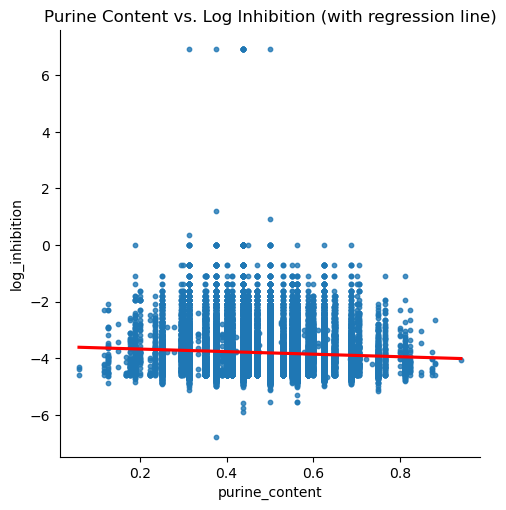

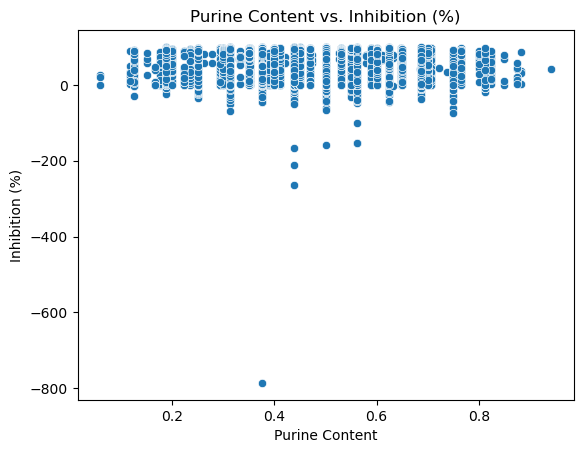

In [ ]:
# Test purine content behavior 
print_correlations(filtered, 'purine_content', 'log_inhibition')
print_correlations(filtered, 'purine_content', INHIBITION)  

sns.lmplot(data=filtered, x='purine_content', y='log_inhibition', scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('Purine Content vs. Log Inhibition (with regression line)')
plt.show()

sns.scatterplot(data=filtered, x='purine_content', y=INHIBITION)
plt.title('Purine Content vs. Inhibition (%)')
plt.xlabel('Purine Content')
plt.ylabel('Inhibition (%)')
plt.show()

Feature: ggg_counts                         , Pearson: -0.01, p-value: 0.22       Target: log_inhibition                     
Feature: ggg_counts                         , Spearman: -0.01, p-value: 0.15       Target: log_inhibition                     
Feature: ggg_counts                         , MIC:      0.00                              Target: log_inhibition                     
Feature: ggg_counts                         , Pearson: -0.01, p-value: 0.2        Target: Inhibition(%)                      
Feature: ggg_counts                         , Spearman: -0.01, p-value: 0.15       Target: Inhibition(%)                      
Feature: ggg_counts                         , MIC:      0.00                              Target: Inhibition(%)                      


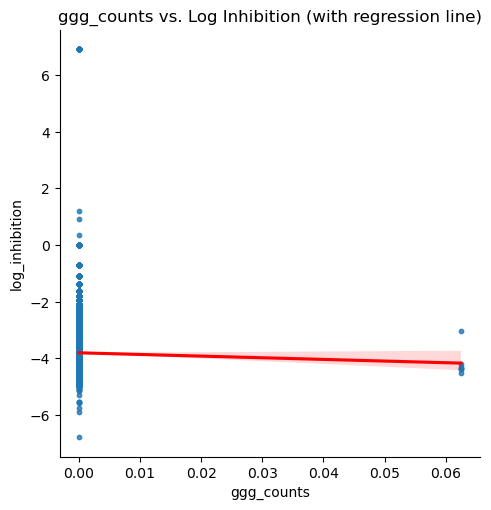

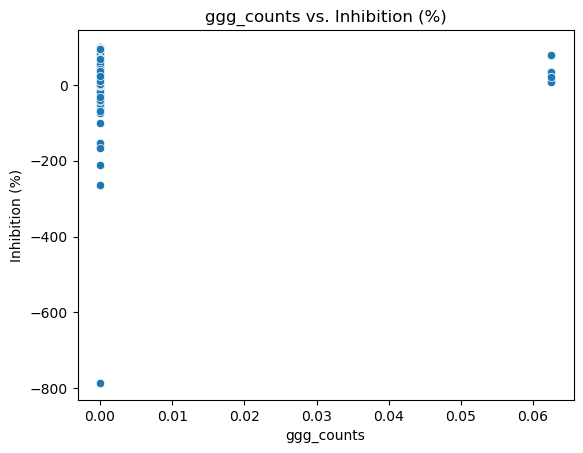

In [ ]:
# Test GGG count behavior
print_correlations(filtered,"ggg_counts","log_inhibition")
print_correlations(filtered, 'ggg_counts', INHIBITION)  

sns.lmplot(data=filtered, x='ggg_counts', y='log_inhibition', scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('ggg_counts vs. Log Inhibition (with regression line)')
plt.show()

sns.scatterplot(data=filtered, x='ggg_counts', y=INHIBITION)
plt.title('ggg_counts vs. Inhibition (%)')
plt.xlabel('ggg_counts')
plt.ylabel('Inhibition (%)')
plt.show()


Feature: ENC                                , Pearson: -0.00, p-value: 0.85       Target: log_inhibition                     
Feature: ENC                                , Spearman: 0.03 , p-value: 1.8e-05    Target: log_inhibition                     
Feature: ENC                                , MIC:      0.09                              Target: log_inhibition                     
Feature: ENC                                , Pearson: 0.03 , p-value: 2.9e-05    Target: Inhibition(%)                      
Feature: ENC                                , Spearman: 0.03 , p-value: 1.8e-05    Target: Inhibition(%)                      
Feature: ENC                                , MIC:      0.08                              Target: Inhibition(%)                      


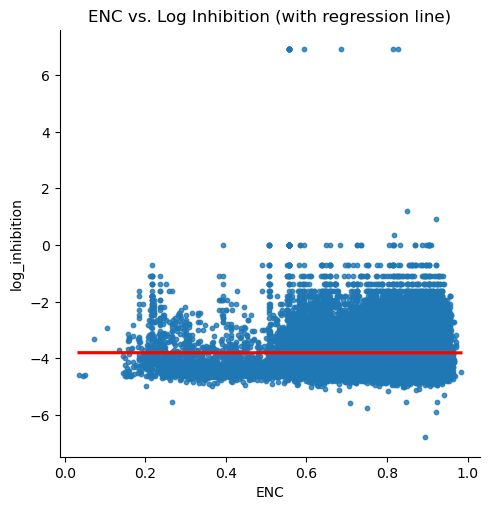

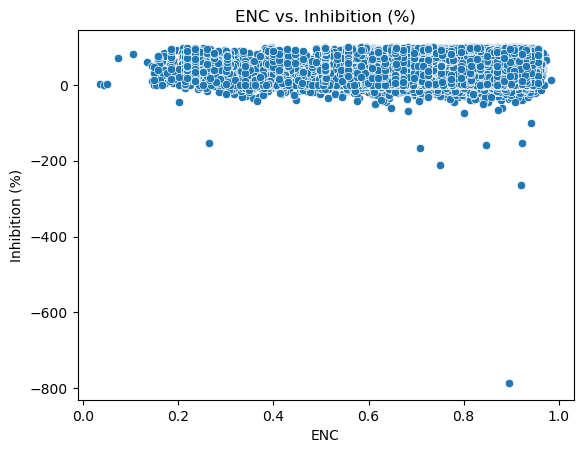

In [ ]:
# Test ENC behavior
print_correlations(filtered,"ENC","log_inhibition")
print_correlations(filtered, 'ENC', INHIBITION)  

sns.lmplot(data=filtered, x='ENC', y='log_inhibition', scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('ENC vs. Log Inhibition (with regression line)')
plt.show()

sns.scatterplot(data=filtered, x='ENC', y=INHIBITION)
plt.title('ENC vs. Inhibition (%)')
plt.xlabel('ENC')
plt.ylabel('Inhibition (%)')
plt.show()

Features Importence test

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

rf = RandomForestRegressor(random_state=42)
rf.fit(filtered[features], filtered['log_inhibition'])

# Get feature importances
importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


for index, row in importance_df.iterrows():
    print(f"{row['Feature']:<35} {row['Importance']:.4f}")


sense_start                         0.1817
Treatment_Period(hours)             0.1287
ASO_volume(nM)                      0.0910
log_volume                          0.0818
at_skew                             0.0619
log_density                         0.0560
ENC                                 0.0368
gc_skew                             0.0357
Cell_line_A431                      0.0280
dispersed_repeats_score             0.0212
flexible_dinucleotide_fraction      0.0203
entropy                             0.0202
dinucleotide_entropy                0.0196
gc_skew_ends                        0.0194
Transfection_free uptake            0.0153
purine_content                      0.0145
gc_block_length                     0.0138
hairpin_tm                          0.0128
hairpin_dG_energy                   0.0123
Modification_MOE/cEt/5-methylcytosines/deoxy 0.0119
tandem_repeats_score                0.0119
hairpin_score                       0.0118
Modification_cEt/5-methylcytosines/deoxy 0.01

In [ ]:
import pandas as pd

# Create the importance DataFrame directly from the model
importance_df = pd.DataFrame({
    'Feature': rf.feature_names_in_,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Define keyword-based categories
sequence_keywords = ['gc', 'entropy', 'ENC', 'skew', 'repeat', 'hairpin', 'palindromic', 'purine', 'at_skew', 'dinucleotide', 'stop_codon', 'ggg']
experimental_keywords = ['volume', 'density', 'Transfection', 'Treatment']
meta_keywords = ['sense_', 'Modification', 'Cell_line']

# Auto-assign categories
def categorize_feature(feature):
    f = feature.lower()
    if any(k in f for k in sequence_keywords):
        return 'sequence'
    elif any(k in f for k in experimental_keywords):
        return 'experimental'
    elif any(k in f for k in meta_keywords):
        return 'meta'
    else:
        return 'other'

importance_df['Category'] = importance_df['Feature'].apply(categorize_feature)
importance_df['Importance'] = importance_df['Importance'].round(4)

# Display the result
display(importance_df)

,Feature,Importance,Category
0,sense_start,0.1817,meta
5,Treatment_Period(hours),0.1287,other
2,ASO_volume(nM),0.0910,experimental
3,log_volume,0.0818,experimental
48,at_skew,0.0619,sequence
4,log_density,0.0560,experimental
35,ENC,0.0368,other
46,gc_skew,0.0357,sequence
7,Cell_line_A431,0.0280,other
44,dispersed_repeats_score,0.0212,sequence


models

=== Random Forest ===
Train MAE:     0.153
Validation MAE:0.303
Train Pearson: 0.944
Val Pearson:   0.802
Train Spearman:0.957
Val Spearman:  0.809
Top features:
sense_start                0.176931
log_volume                 0.106621
ASO_volume(nM)             0.101320
Treatment_Period(hours)    0.091589
at_skew                    0.065247
log_density                0.044060
ENC                        0.035529
gc_skew                    0.033477
dispersed_repeats_score    0.027582
Cell_line_A431             0.021975
dtype: float64


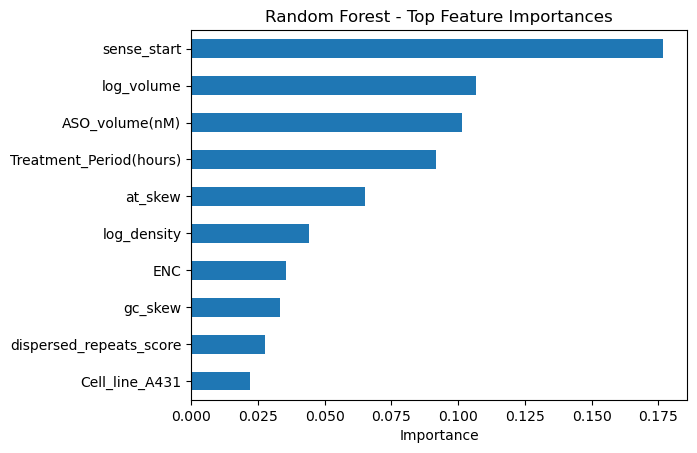

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import pandas as pd

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

train_pred = rf.predict(X_train)
val_pred = rf.predict(X_val)

print("=== Random Forest ===")
print(f"Train MAE:     {mean_absolute_error(y_train, train_pred):.3f}")
print(f"Validation MAE:{mean_absolute_error(y_val, val_pred):.3f}")
print(f"Train Pearson: {pearsonr(y_train, train_pred)[0]:.3f}")
print(f"Val Pearson:   {pearsonr(y_val, val_pred)[0]:.3f}")
print(f"Train Spearman:{spearmanr(y_train, train_pred)[0]:.3f}")
print(f"Val Spearman:  {spearmanr(y_val, val_pred)[0]:.3f}")

rf_importance = pd.Series(rf.feature_importances_, index=X.columns)
top_rf = rf_importance.sort_values(ascending=False).head(10)
print("Top features:")
print(top_rf)

top_rf.plot(kind='barh')
plt.title("Random Forest - Top Feature Importances")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()


/home/nivd1/miniconda3/envs/aso_design/lib/python3.11/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


=== XGBoost ===
Train MAE:     0.239
Validation MAE:0.312
Train Pearson: 0.896
Val Pearson:   0.809
Train Spearman:0.885
Val Spearman:  0.788
Top features:
Cell_line_KARPAS-229                        0.099345
Transfection_free uptake                    0.093716
Treatment_Period(hours)                     0.084196
Cell_line_U251                              0.079539
Transfection_uptake                         0.052286
Cell_line_A431                              0.044065
Modification_MOE/5-methylcytosines/deoxy    0.042288
Cell_line_A-431                             0.037985
Cell_line_KMS11                             0.036978
ASO_volume(nM)                              0.036607
dtype: float32


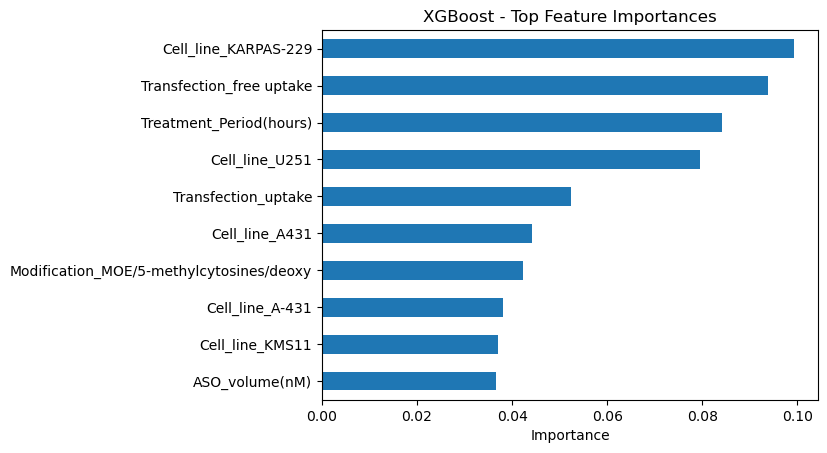

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

train_pred = xgb.predict(X_train)
val_pred = xgb.predict(X_val)

print("=== XGBoost ===")
print(f"Train MAE:     {mean_absolute_error(y_train, train_pred):.3f}")
print(f"Validation MAE:{mean_absolute_error(y_val, val_pred):.3f}")
print(f"Train Pearson: {pearsonr(y_train, train_pred)[0]:.3f}")
print(f"Val Pearson:   {pearsonr(y_val, val_pred)[0]:.3f}")
print(f"Train Spearman:{spearmanr(y_train, train_pred)[0]:.3f}")
print(f"Val Spearman:  {spearmanr(y_val, val_pred)[0]:.3f}")

xgb_importance = pd.Series(xgb.feature_importances_, index=X.columns)
top_xgb = xgb_importance.sort_values(ascending=False).head(10)
print("Top features:")
print(top_xgb)

top_xgb.plot(kind='barh')
plt.title("XGBoost - Top Feature Importances")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

train_pred = lr.predict(X_train)
val_pred = lr.predict(X_val)

print("=== Linear Regression ===")
print(f"Train MAE:     {mean_absolute_error(y_train, train_pred):.3f}")
print(f"Validation MAE:{mean_absolute_error(y_val, val_pred):.3f}")
print(f"Train Pearson: {pearsonr(y_train, train_pred)[0]:.3f}")
print(f"Val Pearson:   {pearsonr(y_val, val_pred)[0]:.3f}")
print(f"Train Spearman:{spearmanr(y_train, train_pred)[0]:.3f}")
print(f"Val Spearman:  {spearmanr(y_val, val_pred)[0]:.3f}")

=== Linear Regression ===
Train MAE:     0.437
Validation MAE:0.438
Train Pearson: 0.628
Val Pearson:   0.612
Train Spearman:0.617
Val Spearman:  0.598


try to find the best hyperparameters

In [ ]:
"""""
#RF by MSE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Reduced parameter grid to prevent memory overload
param_grid = {
    'n_estimators': [100],          # Fixed number of trees (safe)
    'max_depth': [5, 10],           # Reasonable depth limits
    'min_samples_split': [2, 5]     # Only two options to test
}

# GridSearch setup
grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Optimize for MAE
    cv=5,                                # 5-fold CV
    n_jobs=-1,                           # Use all cores
    verbose=2                            # Print progress
)

# Fit grid search on training set
grid_rf.fit(X_train, y_train)

# Print best configuration and its score
print("Best Parameters:", grid_rf.best_params_)
print("Best Validation MAE:", -grid_rf.best_score_)
"""

'""\n#RF by MSE\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestRegressor\n\n# Reduced parameter grid to prevent memory overload\nparam_grid = {\n    \'n_estimators\': [100],          # Fixed number of trees (safe)\n    \'max_depth\': [5, 10],           # Reasonable depth limits\n    \'min_samples_split\': [2, 5]     # Only two options to test\n}\n\n# GridSearch setup\ngrid_rf = GridSearchCV(\n    estimator=RandomForestRegressor(random_state=42),\n    param_grid=param_grid,\n    scoring=\'neg_mean_absolute_error\',  # Optimize for MAE\n    cv=5,                                # 5-fold CV\n    n_jobs=-1,                           # Use all cores\n    verbose=2                            # Print progress\n)\n\n# Fit grid search on training set\ngrid_rf.fit(X_train, y_train)\n\n# Print best configuration and its score\nprint("Best Parameters:", grid_rf.best_params_)\nprint("Best Validation MAE:", -grid_rf.best_score_)\n'

In [ ]:
"""""
#RF by spearman
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer

# Custom scorer for Spearman correlation
def spearman_score(y_true, y_pred):
    return spearmanr(y_true, y_pred).correlation

# Create a scorer object (greater_is_better=True → maximize score)
spearman_scorer = make_scorer(spearman_score, greater_is_better=True)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Smaller grid for safety
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

# Grid search using Spearman scorer
grid_rf_spearman = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring=spearman_scorer,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_rf_spearman.fit(X_train, y_train)

# Output best result
print("Best parameters (Spearman):", grid_rf_spearman.best_params_)
print("Best Spearman score (CV):", grid_rf_spearman.best_score_)
""""

SyntaxError: unterminated string literal (detected at line 38) (3604821328.py, line 38)

In [ ]:
"""""
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from scipy.stats import spearmanr

# Define custom scoring function using Spearman correlation
def spearman_score(y_true, y_pred):
    return spearmanr(y_true, y_pred).correlation

# Create a scorer object compatible with GridSearchCV
spearman_scorer = make_scorer(spearman_score, greater_is_better=True)

# Define a focused parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200],         # Number of boosting rounds (trees)
    'max_depth': [3, 5, 7],             # Maximum depth of each tree
    'learning_rate': [0.05, 0.1, 0.2]   # Step size shrinkage (how fast the model learns)
}

# Set up the GridSearchCV
grid_xgb = GridSearchCV(
    estimator=XGBRegressor(random_state=42, verbosity=0),
    param_grid=param_grid,
    scoring=spearman_scorer,
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # Use all available CPU cores
    verbose=2           # Show progress during training
)

# Run the grid search on the training set
grid_xgb.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best parameters (Spearman):", grid_xgb.best_params_)
print("Best Spearman score (CV):", grid_xgb.best_score_)
"""


Fitting 5 folds for each of 18 candidates, totalling 90 fits


/home/nivd1/miniconda3/envs/aso_design/lib/python3.11/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/nivd1/miniconda3/envs/aso_design/lib/python3.11/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manyli

: 

lets try to split the data to groups

In [ ]:
group_counts = (
    filtered.groupby(['Treatment_Period(hours)', 'ASO_volume(nM)'])
    .size()
    .reset_index(name='Count')
)

valid_groups = group_counts[group_counts['Count'] >= 1000].copy()
valid_groups = valid_groups.sort_values(by='Count', ascending=False)

print(valid_groups)


    Treatment_Period(hours)  ASO_volume(nM)  Count
33                       24          1000.0   5916
38                       24          4000.0   3149
45                       48             5.0   3053
40                       24          7000.0   1567
39                       24          5000.0   1523
36                       24          2000.0   1439
51                       48          2000.0   1133


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr, spearmanr
import pandas as pd

# Define group conditions
group_conditions = [
    (24, 1000.0),
    (24, 4000.0),
    (48, 5.0),
    (24, 7000.0),
    (24, 5000.0),
    (24, 2000.0),
    (48, 2000.0)
]

# Features to exclude (they're fixed in each group)
exclude_features = [
    'Treatment_Period(hours)',
    'ASO_volume(nM)',
    'log_volume',
    'log_density',
    'log_inhibition',
    'Inhibition(%)',
    'ISIS',
    'Density(cells/well)',
    'Sequence',
    'Target_gene'
]

results = []

# Train model per group
for treatment, volume in group_conditions:
    print(f"\n=== Training model for Treatment={treatment}h, Volume={volume}nM ===")

    group_df = filtered[
        (filtered['Treatment_Period(hours)'] == treatment) &
        (filtered['ASO_volume(nM)'] == volume)
    ].copy()

    print(f"Samples in group: {len(group_df)}")

    # Automatically select features that vary (not excluded)
    feature_candidates = [col for col in group_df.columns if col not in exclude_features]

    # Use only numeric features
    X = group_df[feature_candidates].select_dtypes(include='number')
    y = group_df['log_inhibition']

    print("Features used in model:")
    print(X.columns.tolist())

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    mae = mean_absolute_error(y_val, y_pred)
    pearson = pearsonr(y_val, y_pred)[0]
    spearman = spearmanr(y_val, y_pred)[0]

    importance = pd.Series(model.feature_importances_, index=X.columns)

    results.append({
        'Treatment': treatment,
        'Volume': volume,
        'Count': len(group_df),
        'MAE': mae,
        'Pearson': pearson,
        'Spearman': spearman,
        'Feature_Importances': importance.sort_values(ascending=False).to_dict()
    })

# Display summary (excluding detailed importances for now)
summary_df = pd.DataFrame(results)
summary_df.drop(columns='Feature_Importances', inplace=True)
display(summary_df)





=== Training model for Treatment=24h, Volume=1000.0nM ===
Samples in group: 5916
Features used in model:
['seq_length', 'purine_content', 'ggg_counts', 'ENC', '4 palindromic', '6 palindromic', 'entropy', 'hairpin_score', 'toxic_motif_count', 'hairpin_dG_energy', 'hairpin_tm', 'tandem_repeats_score', 'dispersed_repeats_score', 'flexible_dinucleotide_fraction', 'gc_skew', 'gc_skew_ends', 'at_skew', 'stop_codon_count', 'nucleotide_diversity', 'cg_dinucleotide_fraction', 'poly_pyrimidine_stretch', 'dinucleotide_entropy', 'gc_block_length', 'at_rich_region_score', 'sense_start', 'sense_length']

=== Training model for Treatment=24h, Volume=4000.0nM ===
Samples in group: 3149
Features used in model:
['seq_length', 'purine_content', 'ggg_counts', 'ENC', '4 palindromic', '6 palindromic', 'entropy', 'hairpin_score', 'toxic_motif_count', 'hairpin_dG_energy', 'hairpin_tm', 'tandem_repeats_score', 'dispersed_repeats_score', 'flexible_dinucleotide_fraction', 'gc_skew', 'gc_skew_ends', 'at_skew', '

,Treatment,Volume,Count,MAE,Pearson,Spearman
0,24,1000.0,5916,0.257120,0.693817,0.711682
1,24,4000.0,3149,0.292959,0.684721,0.599068
2,48,5.0,3053,0.248128,0.652186,0.667078
3,24,7000.0,1567,0.457006,0.641337,0.626343
4,24,5000.0,1523,0.330842,0.744575,0.781643
5,24,2000.0,1439,0.585541,0.631948,0.736124
6,48,2000.0,1133,0.324139,0.798994,0.787275
